# Obtener información sobre el dispositivo
Se puede obtener la información general del dispositivo mediante la función nvidia-smi, para ejecutarla como si estuvieramos en una terminal, se debe utilizar el ! en google colab

In [ ]:
!nvidia-smi

Sat Oct 29 19:33:23 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Se importan los paquetes que se van a utilizar
import cupy as cp
import numpy as np
import cv2
import matplotlib.pyplot as plt
from numba import cuda

In [ ]:
# Otra forma de encontrar la información del dispositivo
cuda.detect()

Found 1 CUDA devices
id 0             b'Tesla T4'                              [SUPPORTED]
                      Compute Capability: 7.5
                           PCI Device ID: 4
                              PCI Bus ID: 0
                                    UUID: GPU-91e11111-4f0c-0464-c174-6d9c52b96293
                                Watchdog: Disabled
             FP32/FP64 Performance Ratio: 32
Summary:
	1/1 devices are supported


True

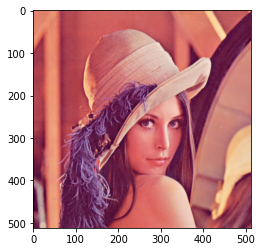

In [ ]:
# Abrimos una imagen para comparar cpu vs gpu
# Mostramos y abrimos la imagen
original_img = cv2.imread('Lenna.png')
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
plt.imshow(original_img)
plt.show()

# Implementación en CPU

In [ ]:
from scipy.ndimage import correlate

# Creamos la máscara de convolución
x=[[-1.0,0.0,1.0],[ -1.0, 0.0, 1.0],[-1.0,0.0,1.0]]
mask=np.array([x,x,x])


In [ ]:
%%timeit
np.clip(correlate(original_img, mask), 0, 255)

24.7 ms ± 10.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


#Implementación con GPU

In [ ]:
# Primero movemos el arreglo a la GPU
%%timeit
cp.asarray(original_img)

137 µs ± 52.6 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
cp.asarray(mask)

34.2 µs ± 6.01 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
from cupyx.scipy.ndimage import correlate as correlate_gpu

In [ ]:
img_gpu = cp.asarray(original_img)
mask_gpu = cp.asarray(mask)

In [ ]:
%%timeit
correlate_gpu(img_gpu, mask_gpu)

105 µs ± 59.7 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
result_gpu = cp.asnumpy(correlate_gpu(img_gpu, mask_gpu))

In [ ]:
result_gpu.shape

(512, 512, 3)

In [ ]:
original_img.shape

(512, 512, 3)